In [325]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#importing libraries

In [326]:
df = pdr.get_data_tiingo('NVDA', api_key = '') #getting stock data values over time using tiingo (note: one needs autentivation key whihc one can get for free ny login to tiingo)

In [327]:
df.to_csv('NVDA.csv') #converting extracted data to csv

In [328]:
df = pd.read_csv('NVDA.csv') #reading extracted data using python

In [329]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2018-09-04 00:00:00+00:00,283.70,285.22,279.00,280.15,9793027,70.314399,70.691127,69.149514,69.434539,39172108,0.0,1.0
1,NVDA,2018-09-05 00:00:00+00:00,278.42,284.42,275.15,282.99,9828919,69.005763,70.492849,68.195301,70.138427,39315676,0.0,1.0
2,NVDA,2018-09-06 00:00:00+00:00,272.72,277.86,271.39,277.76,8069889,67.593031,68.866968,67.263393,68.842183,32279556,0.0,1.0
3,NVDA,2018-09-07 00:00:00+00:00,271.86,276.93,267.19,269.00,7385468,67.379882,68.636470,66.222433,66.671037,29541872,0.0,1.0
4,NVDA,2018-09-10 00:00:00+00:00,274.73,275.93,271.00,272.77,5503457,68.091205,68.388622,67.166733,67.605423,22013828,0.0,1.0


In [330]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,NVDA,2023-08-24 00:00:00+00:00,471.63,502.66,471.5900,502.16,115604409,471.63,502.66,471.5900,502.16,115604409,0.0,1.0
1252,NVDA,2023-08-25 00:00:00+00:00,460.18,478.05,450.2400,470.12,92534052,460.18,478.05,450.2400,470.12,92534052,0.0,1.0
1253,NVDA,2023-08-28 00:00:00+00:00,468.35,469.80,448.8800,464.82,68519223,468.35,469.80,448.8800,464.82,68519223,0.0,1.0
1254,NVDA,2023-08-29 00:00:00+00:00,487.84,490.81,463.9101,466.66,70139699,487.84,490.81,463.9101,466.66,70139699,0.0,1.0
1255,NVDA,2023-08-30 00:00:00+00:00,492.64,499.27,484.2500,490.44,73520598,492.64,499.27,484.2500,490.44,73520598,0.0,1.0


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [332]:
length_data = len(df)     # rows that data has
split_ratio = 0.8         # %80 train + %20 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1256
Train data length : 1005
Validation data lenth : 251


In [333]:
train_data = df[:length_train].iloc[:,:3]
train_data['date'] = pd.to_datetime(train_data['date'])  # converting to date time object
train_data

,symbol,date,close
0,NVDA,2018-09-04 00:00:00+00:00,283.70
1,NVDA,2018-09-05 00:00:00+00:00,278.42
2,NVDA,2018-09-06 00:00:00+00:00,272.72
3,NVDA,2018-09-07 00:00:00+00:00,271.86
4,NVDA,2018-09-10 00:00:00+00:00,274.73
...,...,...,...
1000,NVDA,2022-08-24 00:00:00+00:00,172.22
1001,NVDA,2022-08-25 00:00:00+00:00,179.13
1002,NVDA,2022-08-26 00:00:00+00:00,162.60
1003,NVDA,2022-08-29 00:00:00+00:00,158.01


In [334]:
validation_data = df[length_train:].iloc[:,:3]
validation_data['date'] = pd.to_datetime(validation_data['date'])  # converting to date time object
validation_data

,symbol,date,close
1005,NVDA,2022-08-31 00:00:00+00:00,150.94
1006,NVDA,2022-09-01 00:00:00+00:00,139.37
1007,NVDA,2022-09-02 00:00:00+00:00,136.47
1008,NVDA,2022-09-06 00:00:00+00:00,134.65
1009,NVDA,2022-09-07 00:00:00+00:00,137.14
...,...,...,...
1251,NVDA,2023-08-24 00:00:00+00:00,471.63
1252,NVDA,2023-08-25 00:00:00+00:00,460.18
1253,NVDA,2023-08-28 00:00:00+00:00,468.35
1254,NVDA,2023-08-29 00:00:00+00:00,487.84


In [335]:
dataset_train = train_data.close.values
dataset_train.shape

(1005,)

In [336]:
# Change 1d array to 2d array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1005, 1)

In [337]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1005, 1)

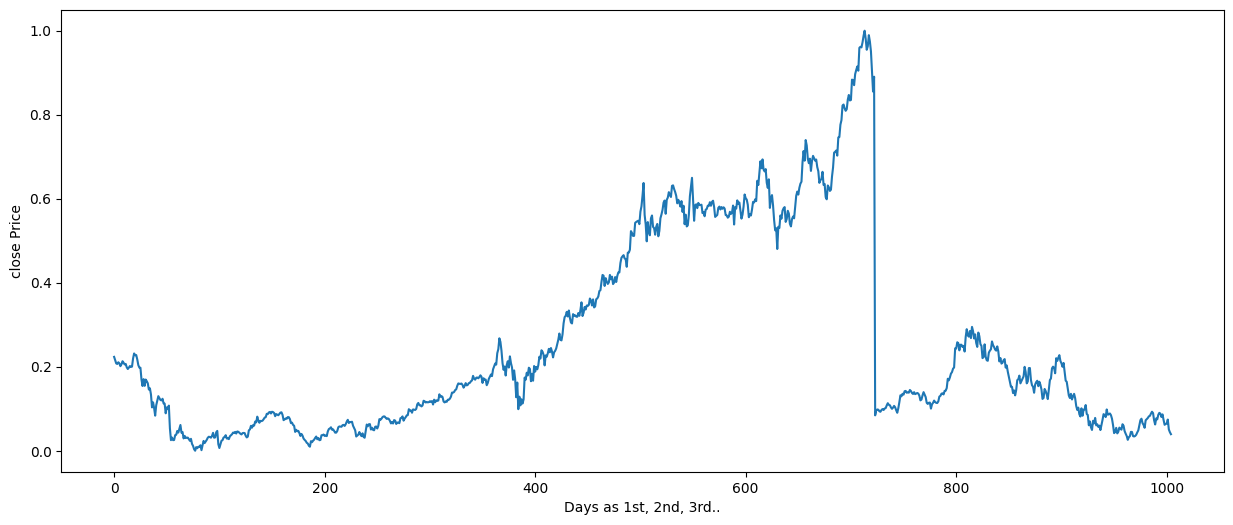

In [338]:
#closing stock prices over days
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("close Price")
plt.show()

In [339]:
#separating the total dataset into train dataset and test/validation dataset
X_train = []
y_train = []

time_step = 100

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [340]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (905, 100)
Shape of y_train before reshape : (905,)


In [341]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (905, 100, 1)
Shape of y_train after reshape : (905, 1)


In [342]:
X_train[0]

array([[0.22346831],
       [0.21593471],
       [0.20780184],
       [0.20657478],
       [0.21066975],
       [0.20791599],
       [0.20135262],
       [0.20583283],
       [0.21309534],
       [0.20952829],
       [0.20537625],
       [0.206746  ],
       [0.19861313],
       [0.19457524],
       [0.19778558],
       [0.20165226],
       [0.1995263 ],
       [0.20021117],
       [0.21964444],
       [0.2315441 ],
       [0.22743487],
       [0.22779157],
       [0.21717604],
       [0.20372114],
       [0.19788546],
       [0.19755729],
       [0.16923494],
       [0.15416774],
       [0.17044774],
       [0.15452444],
       [0.16943469],
       [0.16548241],
       [0.16044574],
       [0.1456639 ],
       [0.14858888],
       [0.1340924 ],
       [0.10320178],
       [0.11522986],
       [0.10160374],
       [0.08352595],
       [0.10832406],
       [0.11949605],
       [0.12988329],
       [0.12533174],
       [0.12083726],
       [0.11982422],
       [0.12371943],
       [0.112

In [343]:
y_train[0]

array([0.00644922])

In [344]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 64,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


regressor.add(
    SimpleRNN(units = 64,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )


regressor.add(
    SimpleRNN(units = 64,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(Dense(units = 1))

regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

#simple RNN model is executed with 3 hidden layers with 64 neurons of simple RNN each and tanh as activation.
#loss is calculated using mean squared error

Epoch 1/100
29/29 [==============================] - 10s 112ms/step - loss: 0.4430 - accuracy: 0.0011
Epoch 2/100
29/29 [==============================] - 3s 100ms/step - loss: 0.3184 - accuracy: 0.0011
Epoch 3/100
29/29 [==============================] - 3s 104ms/step - loss: 0.2692 - accuracy: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 4s 142ms/step - loss: 0.2247 - accuracy: 0.0011
Epoch 5/100
29/29 [==============================] - 3s 104ms/step - loss: 0.1675 - accuracy: 0.0011
Epoch 6/100
29/29 [==============================] - 3s 101ms/step - loss: 0.1318 - accuracy: 0.0011
Epoch 7/100
29/29 [==============================] - 4s 121ms/step - loss: 0.1042 - accuracy: 0.0000e+00
Epoch 8/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0860 - accuracy: 0.0000e+00
Epoch 9/100
29/29 [==============================] - 3s 119ms/step - loss: 0.0599 - accuracy: 0.0011
Epoch 10/100
29/29 [==============================] - 3s 101ms/step - loss: 0.

In [345]:
# Losses
history.history["loss"]

[0.44297027587890625,
 0.3183706998825073,
 0.2692309021949768,
 0.2246934473514557,
 0.16747213900089264,
 0.1317513883113861,
 0.10416579246520996,
 0.08600163459777832,
 0.05993933975696564,
 0.06960619986057281,
 0.05049876496195793,
 0.0479934886097908,
 0.03755752369761467,
 0.03808673098683357,
 0.03401857614517212,
 0.02537849172949791,
 0.02350621670484543,
 0.02147253043949604,
 0.018488934263586998,
 0.0182416383177042,
 0.016297951340675354,
 0.016208317130804062,
 0.01586427167057991,
 0.013847365975379944,
 0.012162337079644203,
 0.013304839842021465,
 0.013339158147573471,
 0.011049930937588215,
 0.010813353583216667,
 0.009946200996637344,
 0.008993303403258324,
 0.008823082782328129,
 0.008223247714340687,
 0.007605734281241894,
 0.0086009930819273,
 0.007266983389854431,
 0.007219875231385231,
 0.007900337688624859,
 0.006223408970981836,
 0.006913107819855213,
 0.006713674869388342,
 0.00560422707349062,
 0.004801029805094004,
 0.0047968910075724125,
 0.0055501288734

In [346]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

29/29 [==============================] - 2s 45ms/step


(905, 1)

In [347]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(905, 1)

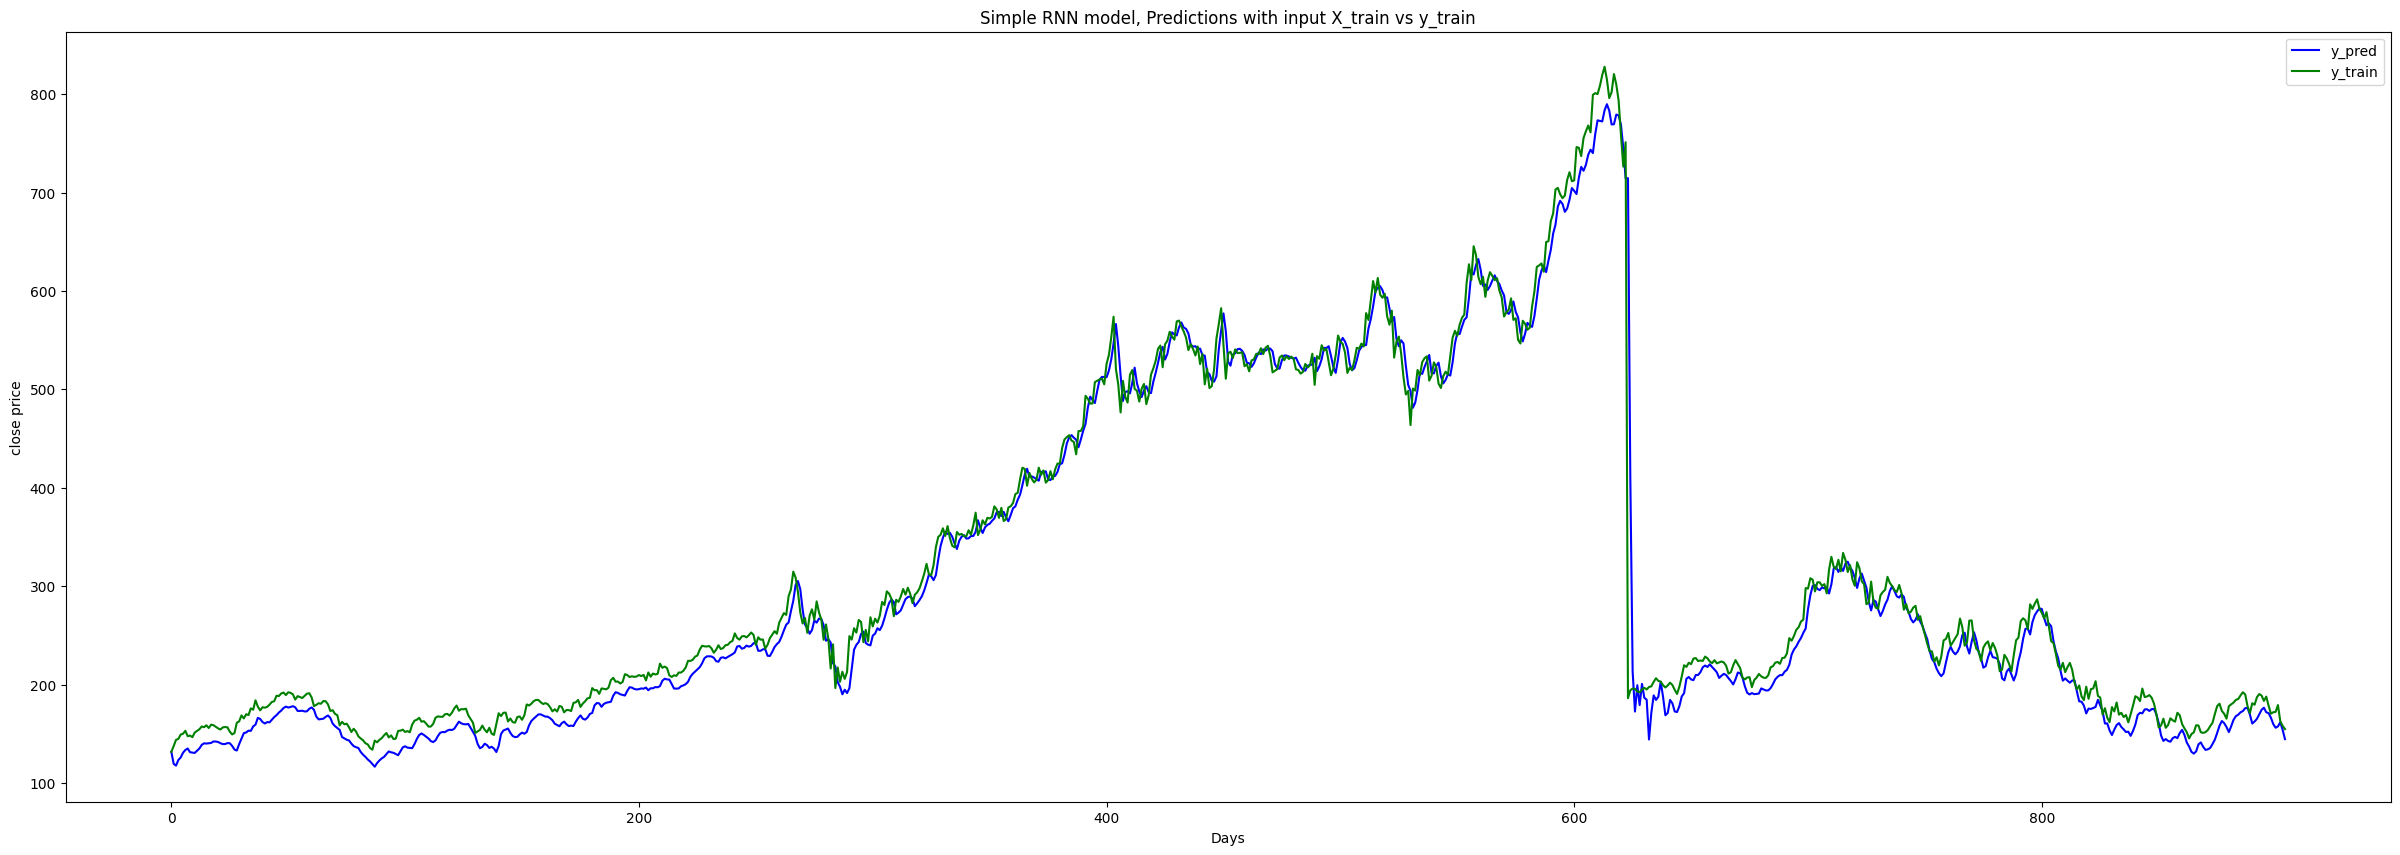

In [348]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


In [349]:
dataset_validation = validation_data.close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling close values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (251, 1)


In [350]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [351]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [352]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (151, 100)
Shape of y_test before reshape : (151,)


In [353]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [354]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (151, 100, 1)
Shape of y_test after reshape : (151, 1)


In [355]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

5/5 [==============================] - 0s 26ms/step


In [356]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [357]:
import math as mt
from sklearn.metrics import mean_squared_error
mt.sqrt(mean_squared_error(y_train, train_predict)) #to get loss in train dataset

131.58116232953915

In [358]:
mt.sqrt(mean_squared_error(y_test, test_predict)) #to get loss in test dataset

338.1627381580434

In [359]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

5/5 [==============================] - 0s 23ms/step
Shape of y_pred_of_test : (151, 1)


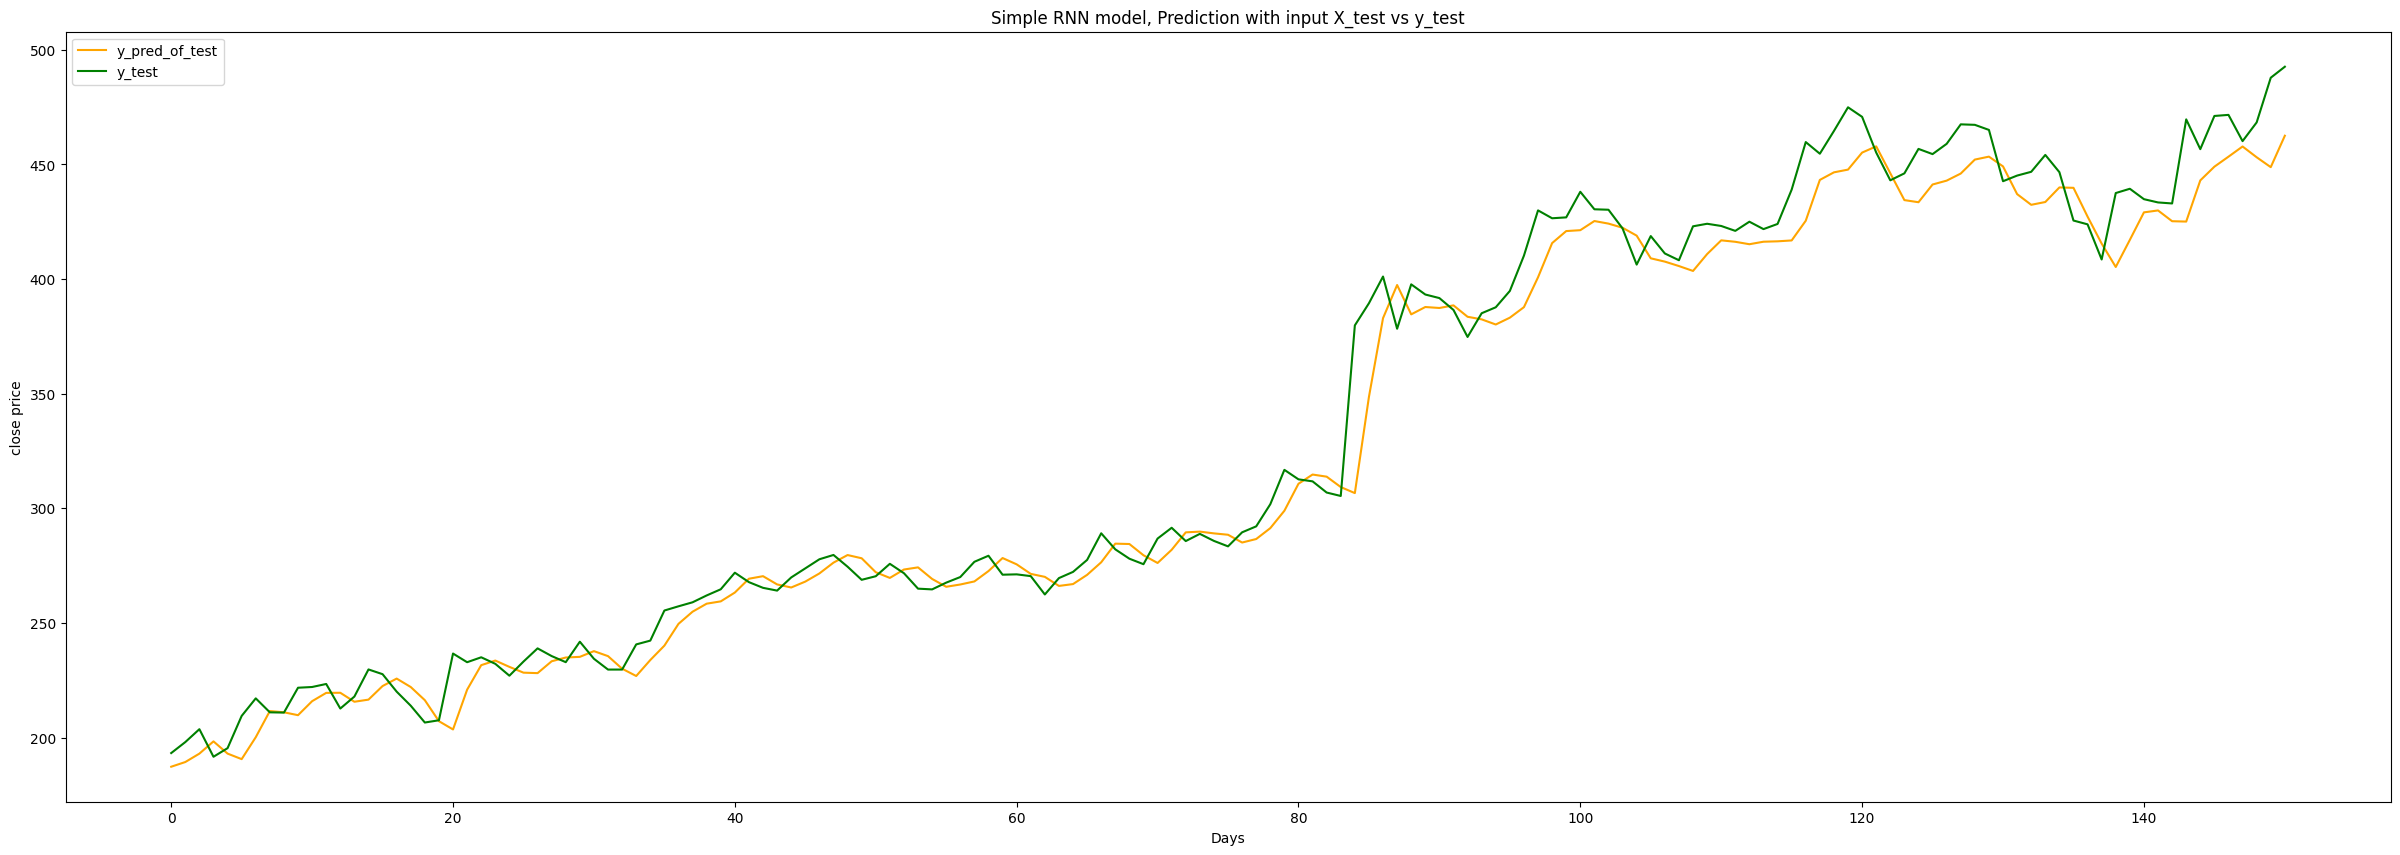

In [360]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

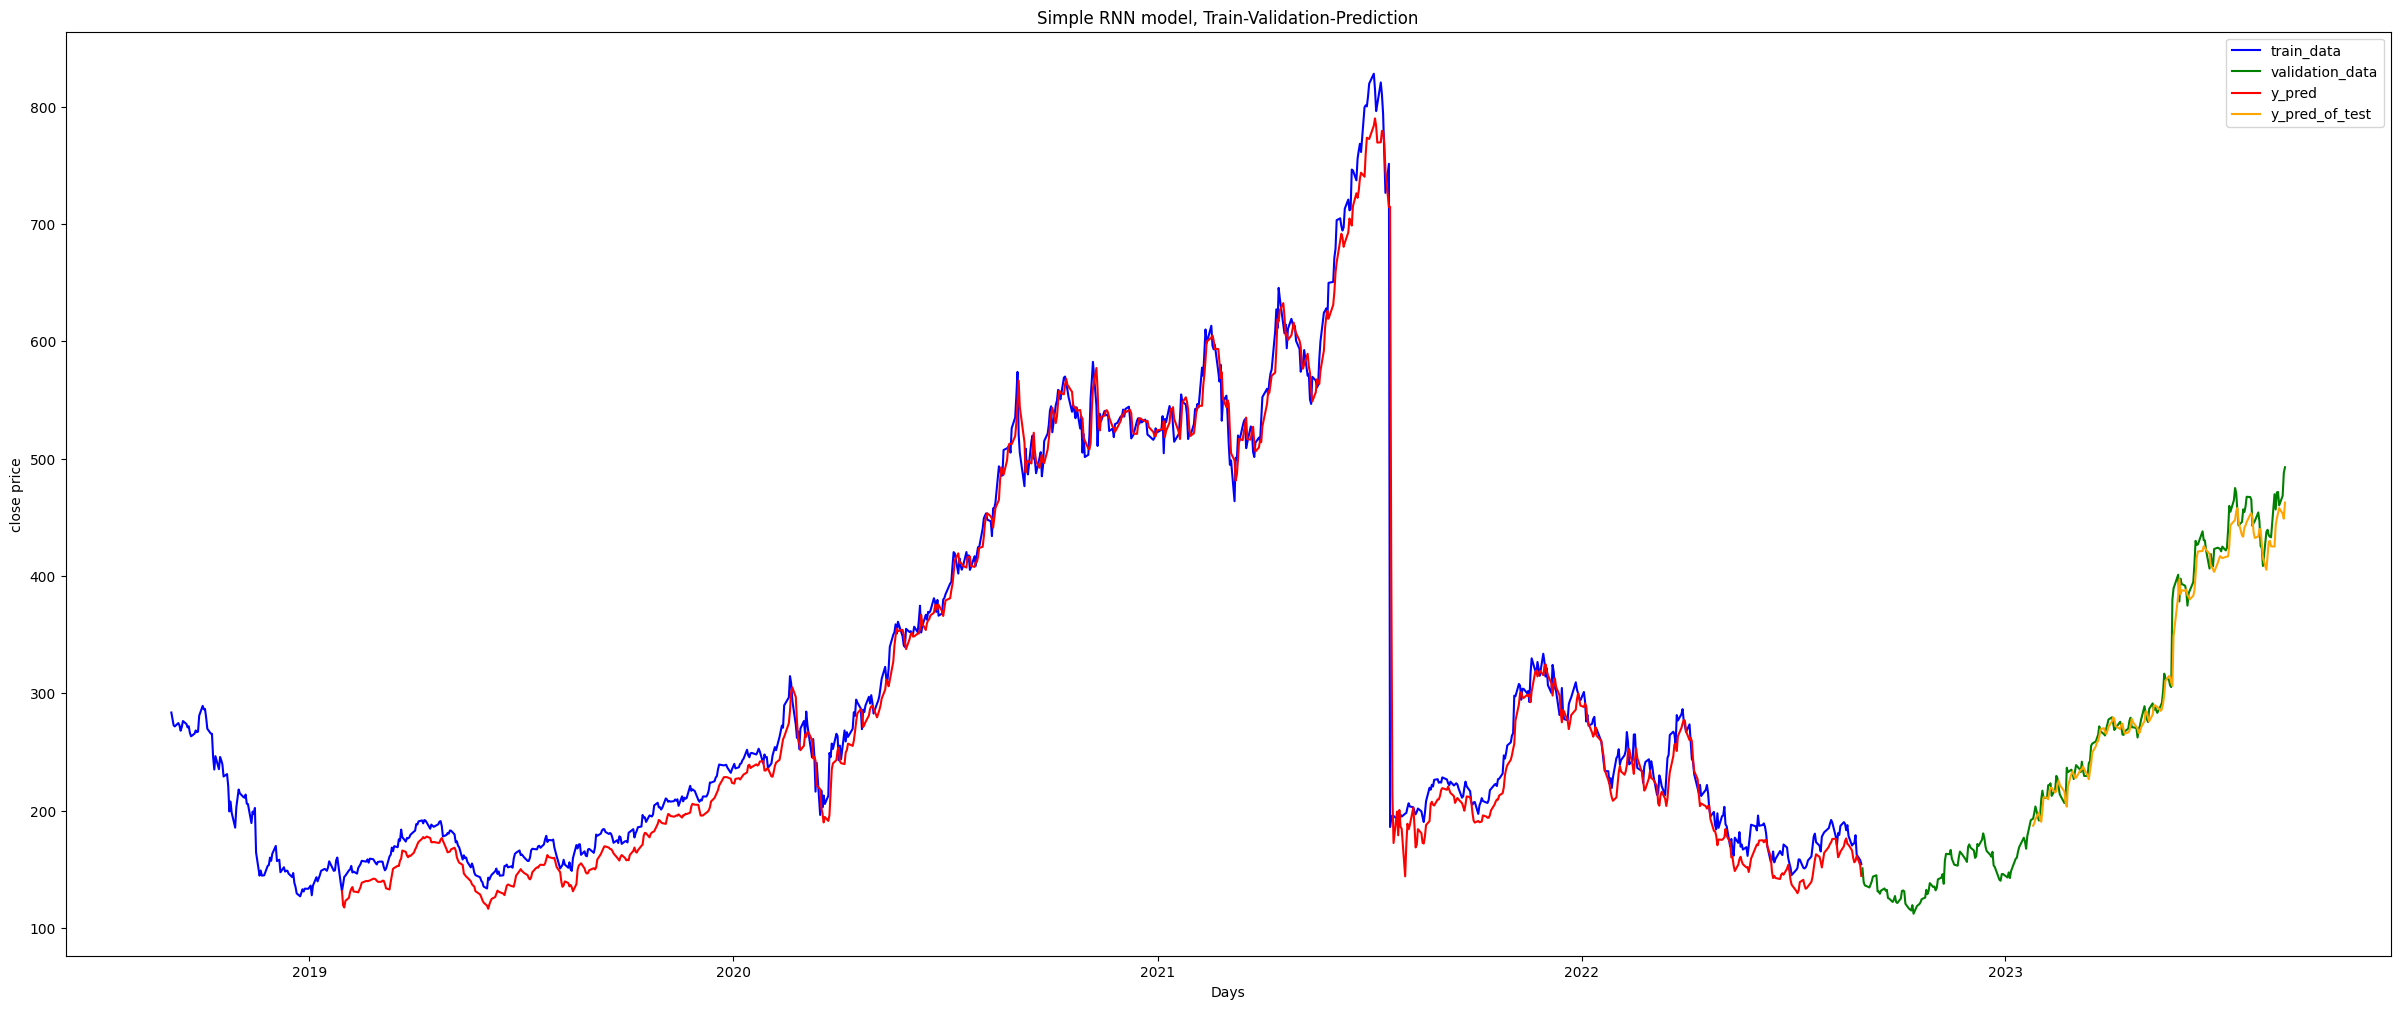

In [361]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.date, train_data.close, label = "train_data", color = "b")
plt.plot(validation_data.date, validation_data.close, label = "validation_data", color = "g")
plt.plot(train_data.date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [362]:
y_train = scaler.fit_transform(y_train)

In [363]:
from keras.layers import LSTM

In [364]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)
#LSTM model is executed with 3 hidden layers with 64 neurons of simple RNN each and tanh as activation.
#loss is calculated using mean squared error

Epoch 1/100
29/29 [==============================] - 17s 286ms/step - loss: 0.0233 - val_loss: 0.0047
Epoch 2/100
29/29 [==============================] - 8s 265ms/step - loss: 0.0118 - val_loss: 0.0182
Epoch 3/100
29/29 [==============================] - 7s 253ms/step - loss: 0.0079 - val_loss: 0.0103
Epoch 4/100
29/29 [==============================] - 7s 245ms/step - loss: 0.0077 - val_loss: 0.0138
Epoch 5/100
29/29 [==============================] - 13s 465ms/step - loss: 0.0049 - val_loss: 0.0113
Epoch 6/100
29/29 [==============================] - 8s 267ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 7/100
29/29 [==============================] - 7s 228ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 8/100
29/29 [==============================] - 8s 268ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 9/100
29/29 [==============================] - 7s 241ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 10/100
29/29 [==============================] - 7s 253ms/step - loss: 0.0026 - val_

In [365]:
y_pred = model.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

29/29 [==============================] - 3s 66ms/step


(905, 1)

In [366]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(905, 1)

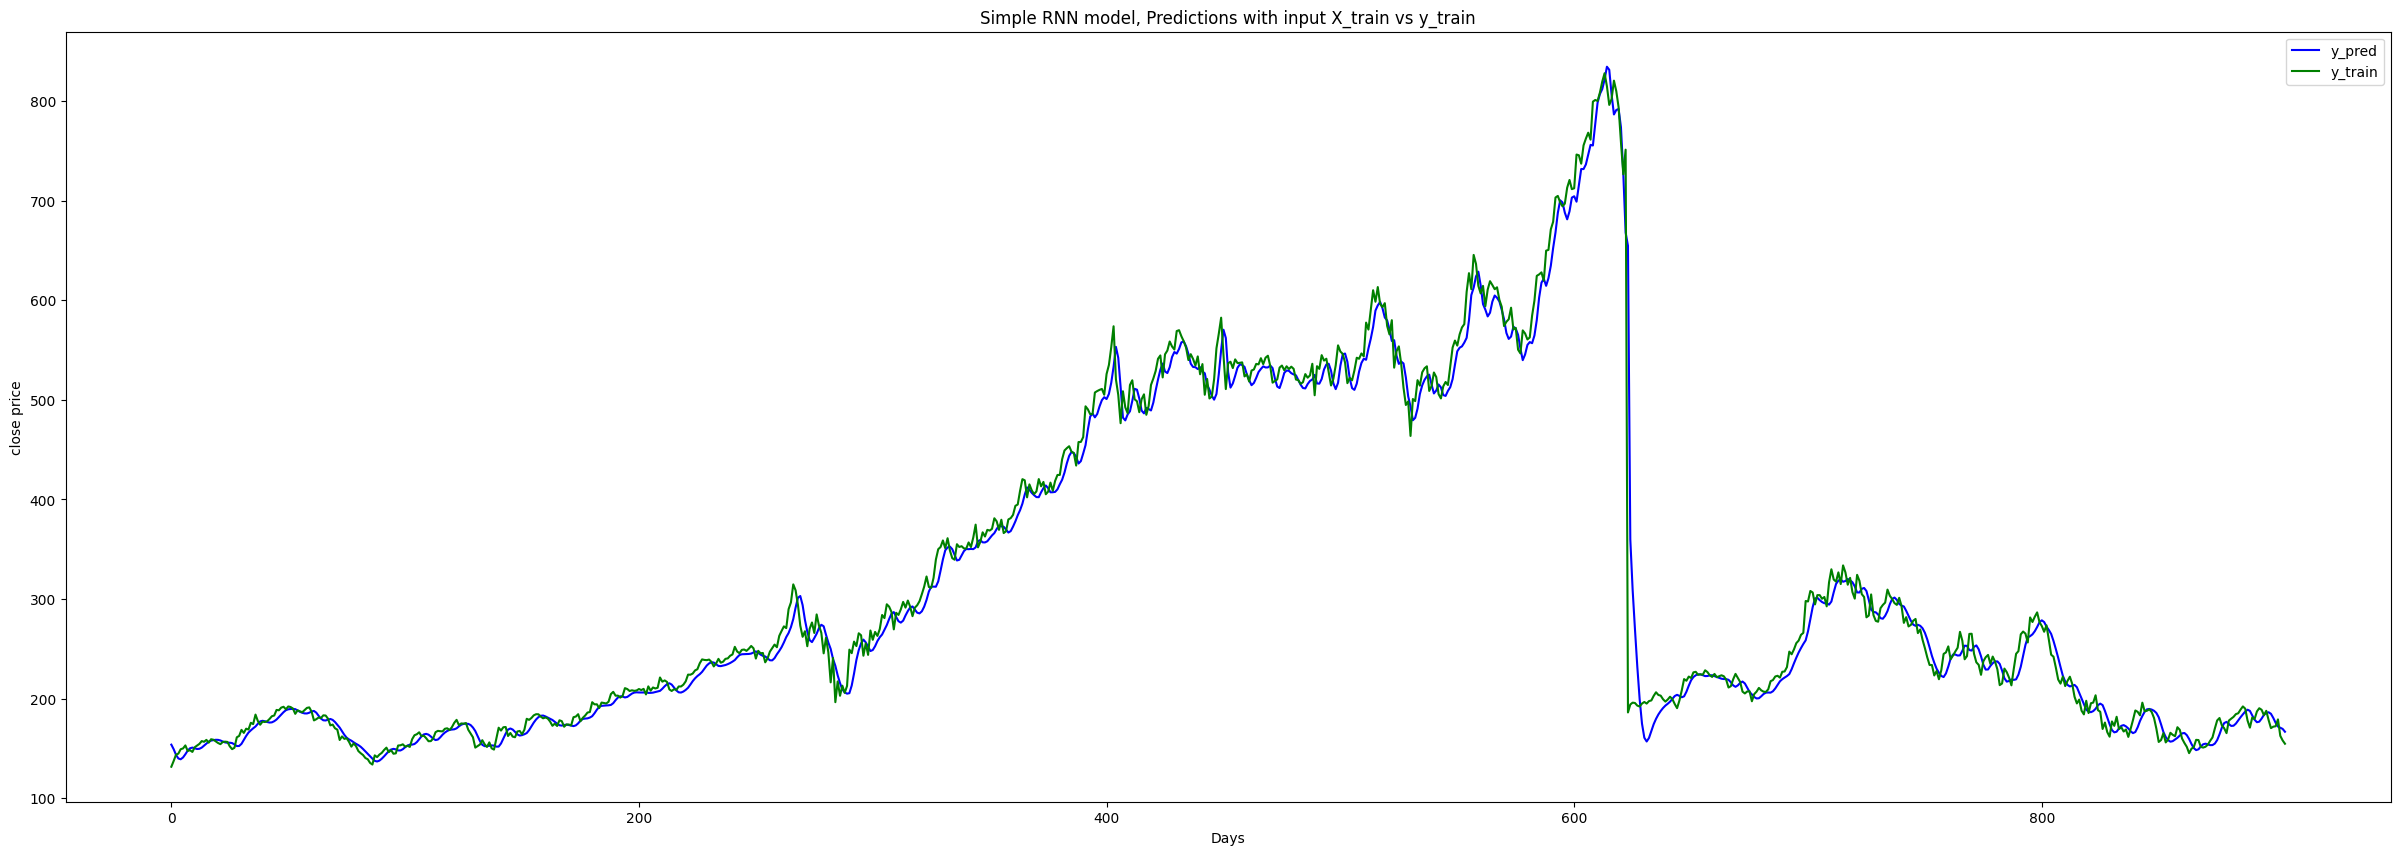

In [367]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [368]:
dataset_validation = validation_data.close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling close values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (251, 1)


In [369]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [370]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [371]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (151, 100)
Shape of y_test before reshape : (151,)


In [372]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [373]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (151, 100, 1)
Shape of y_test after reshape : (151, 1)


In [374]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 1s 99ms/step


In [375]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [376]:
mt.sqrt(mean_squared_error(y_train, train_predict))

132.49983071732174

In [377]:
mt.sqrt(mean_squared_error(y_test, test_predict))

335.3907772965393

In [378]:
# predictions with X_test data
y_pred_of_test = model.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

5/5 [==============================] - 0s 89ms/step
Shape of y_pred_of_test : (151, 1)


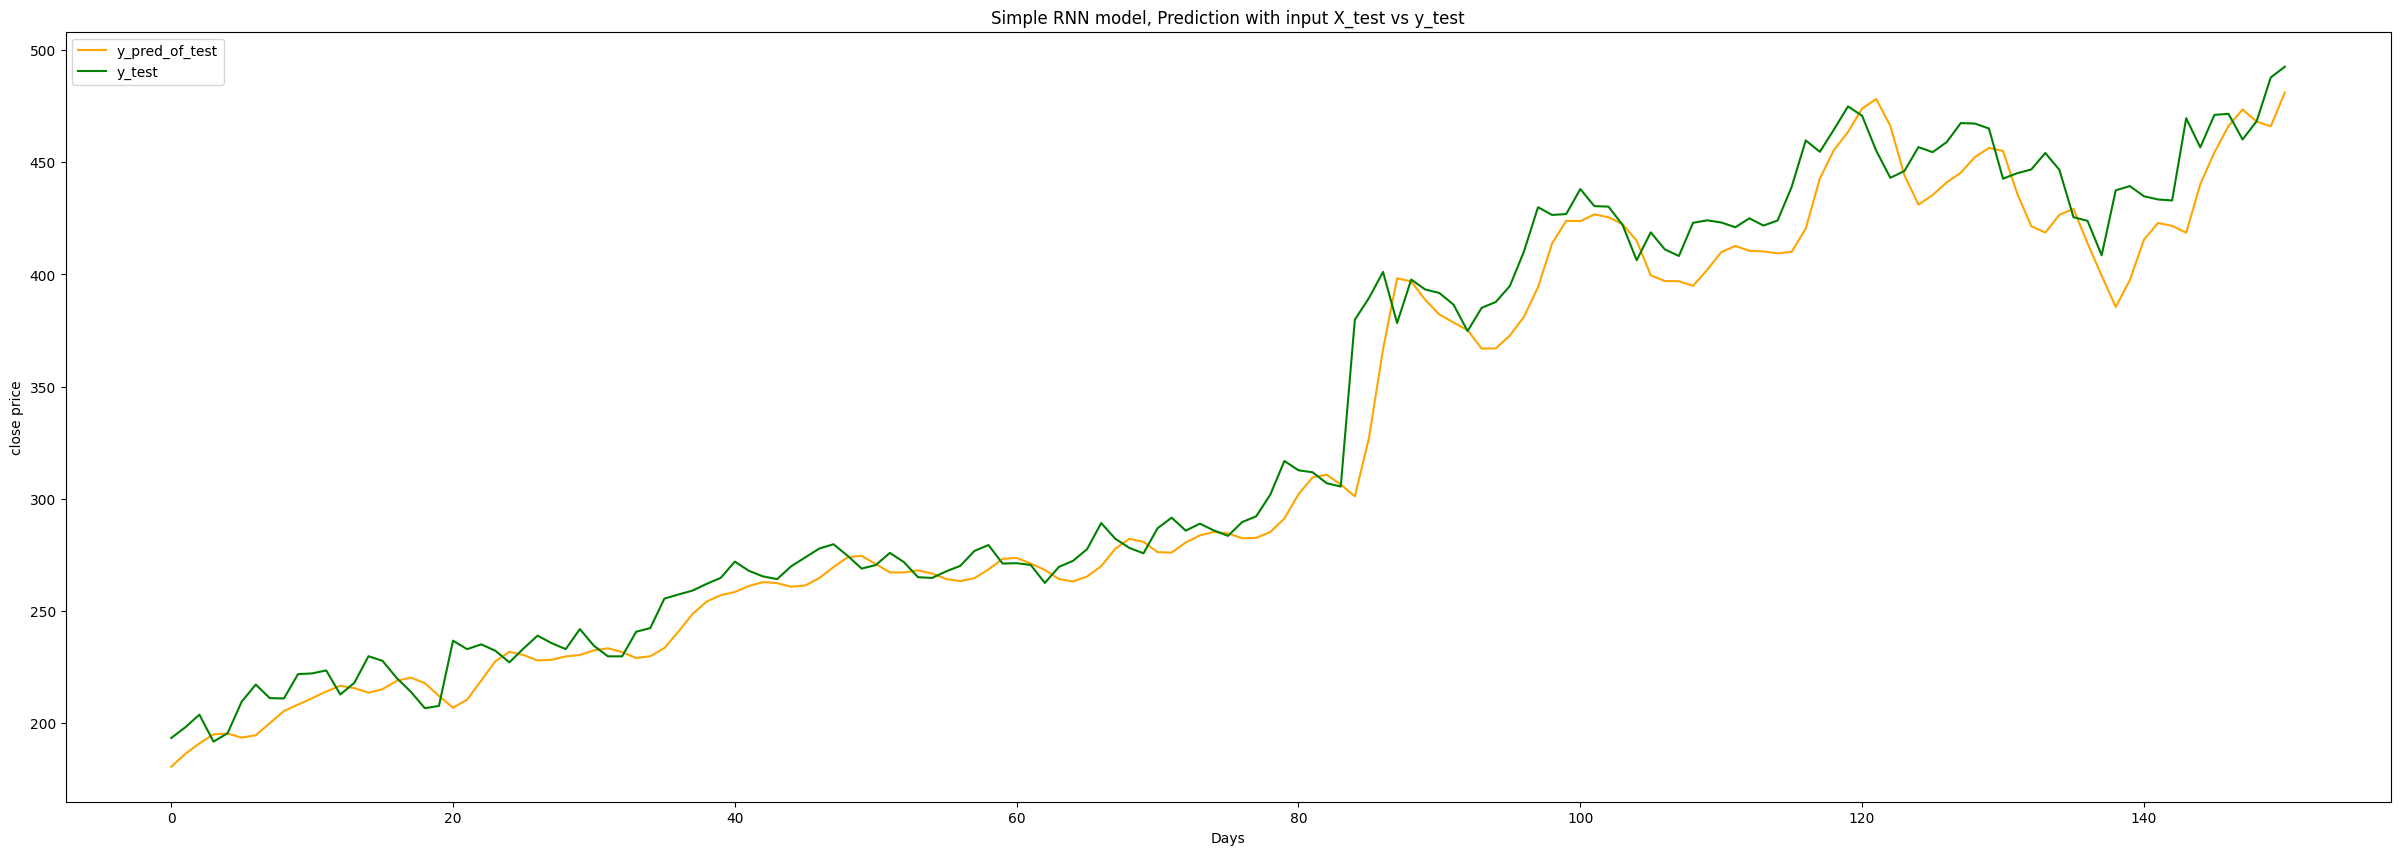

In [379]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

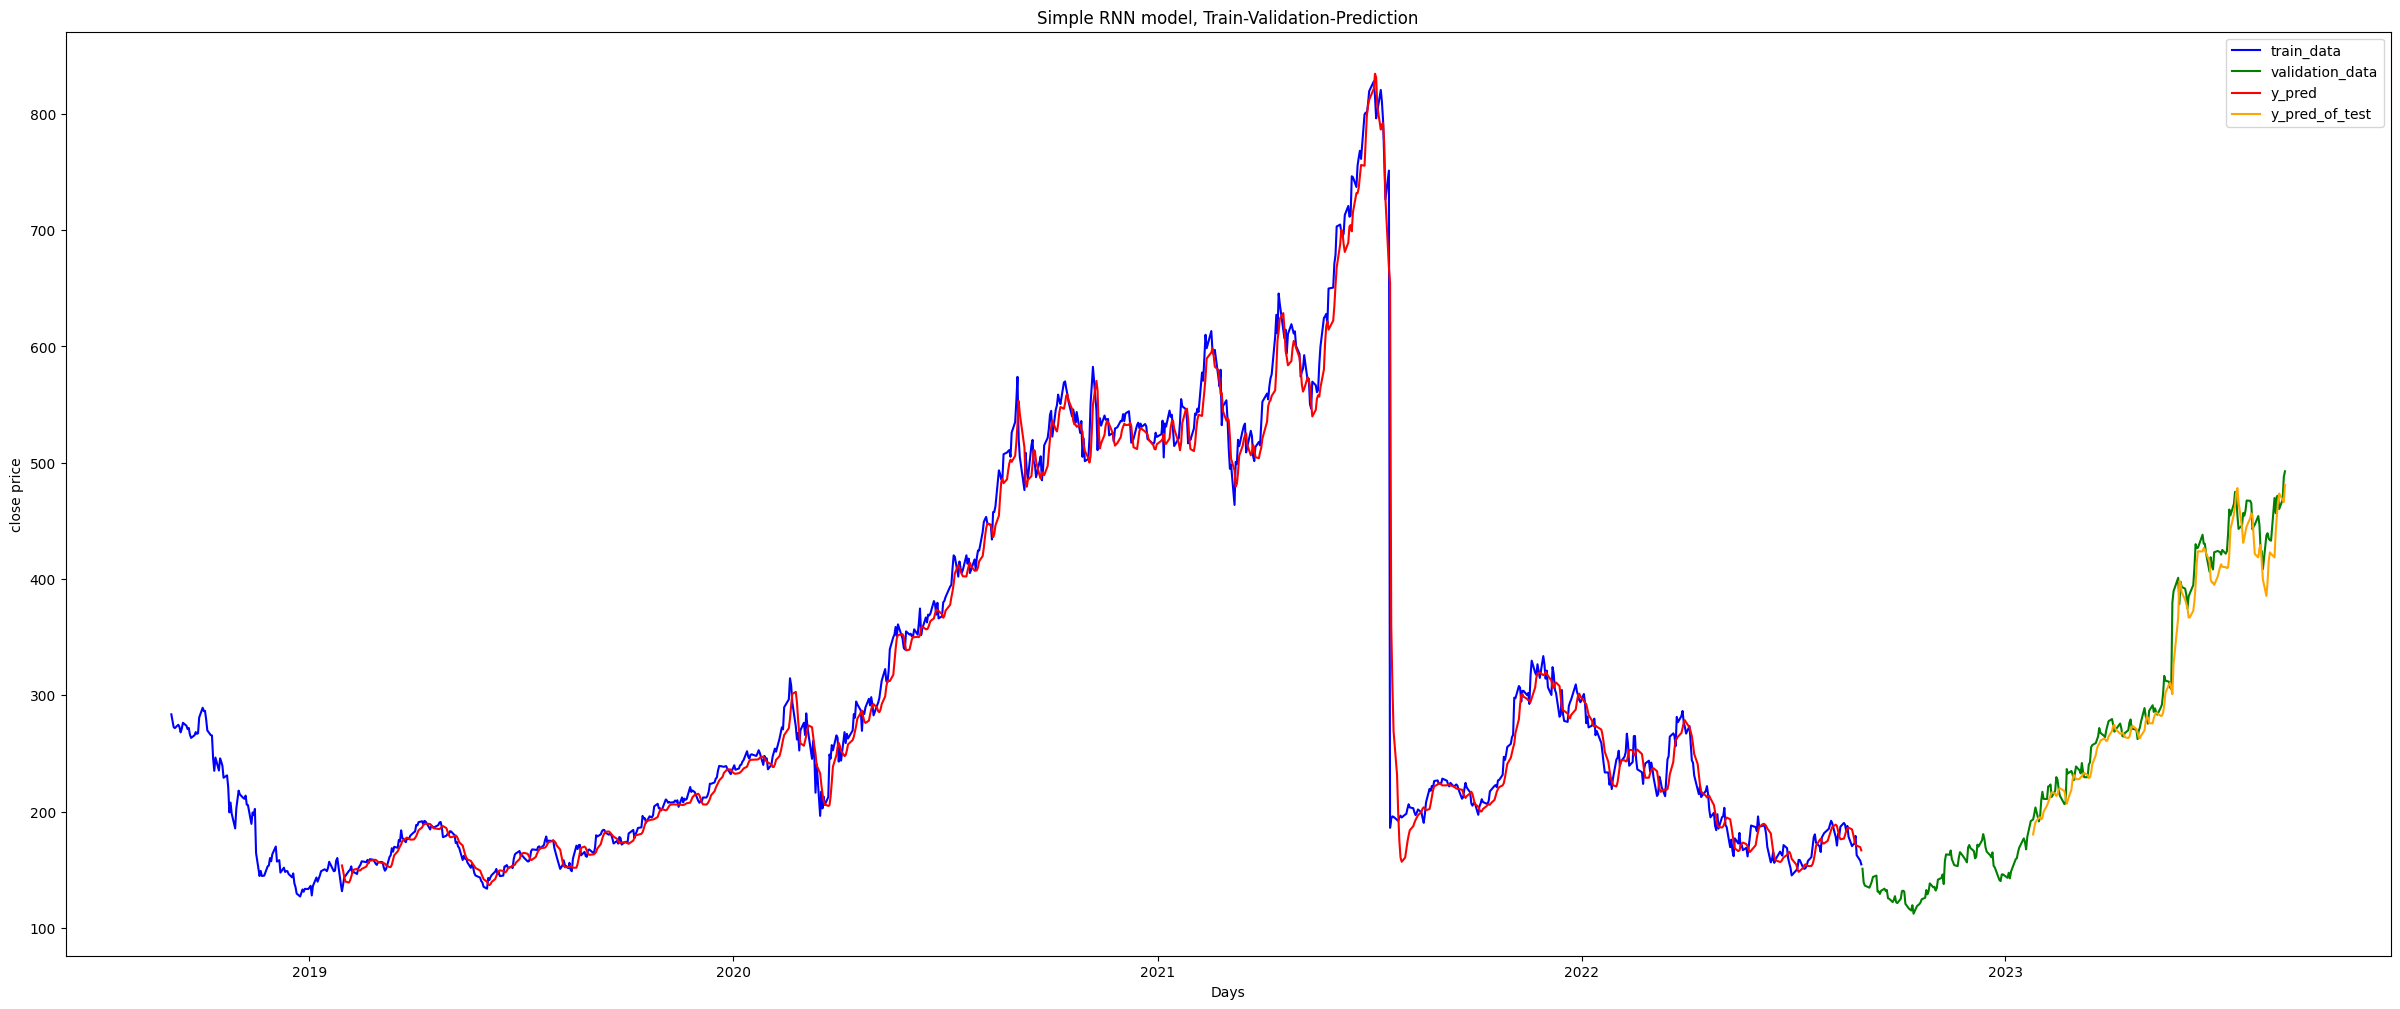

In [380]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.date, train_data.close, label = "train_data", color = "b")
plt.plot(validation_data.date, validation_data.close, label = "validation_data", color = "g")
plt.plot(train_data.date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [381]:
df.iloc[-1]

symbol                              NVDA
date           2023-08-30 00:00:00+00:00
close                             492.64
high                              499.27
low                               484.25
open                              490.44
volume                          73520598
adjClose                          492.64
adjHigh                           499.27
adjLow                            484.25
adjOpen                           490.44
adjVolume                       73520598
divCash                              0.0
splitFactor                          1.0
Name: 1255, dtype: object

In [382]:
X_input = df.iloc[-time_step:].close.values               # getting last 100 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

ValueError: ignored

In [ ]:
#comparing future stock prices for the next day using Simple RNN and LSTM models

simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model.predict(X_input))
print("Simple RNN, close price prediction      :", simple_RNN_prediction[0,0])
print("LSTM prediction, close price prediction :", LSTM_prediction[0,0])
